# <u><center><font color=red>GRIP - The Sparks Foundation</font></center></u>

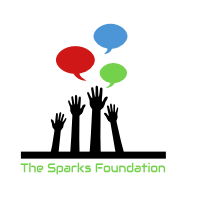

## <u><center><font color=darkblue>Data Science and Business Analytics</font></center></u>

## <font color=darkblue>Task #1 : Prediction Using Supervised ML</font>

## <i>Predict the percentage of a student based on the no. of study hours</i>

**In this task,we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
url="http://bit.ly/w-data"
data = pd.read_csv(url)

## data overview

In [3]:
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

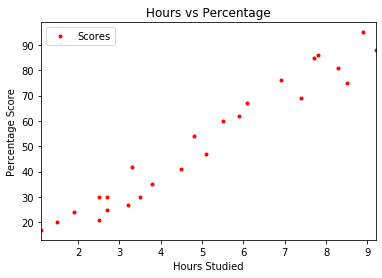

In [9]:
data.plot(x='Hours',y='Scores',style='.',color='red')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

**The above graph shows that there is a positive linear relationship between hours studied and percentage score**

**Separating independent variables and dependent variables**

In [10]:
X=data.iloc[:,:-1].values
y=data.iloc[:,1].values

**Spliting data into train and test data**

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

**Now we will train our algorithm**

In [12]:
from sklearn.linear_model import LinearRegression
r=LinearRegression()
r.fit(X_train,y_train)
print("Training completed")

Training completed


**Regression Line**

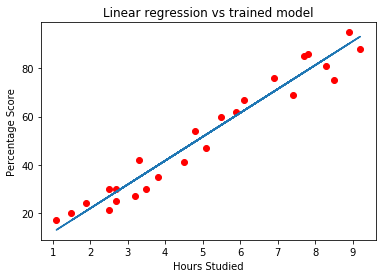

In [18]:
line = r.coef_*X+r.intercept_
plt.title("Linear regression vs trained model")
plt.scatter(X,y,color='red')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.plot(X,line)
plt.show()

### Predictions

In [14]:
print(X_test)
y_pred = r.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [15]:
df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [16]:
print("Training Score ",r.score(X_train,y_train))
print("Testing Score ",r.score(X_test,y_test))

Training Score  0.9515510725211553
Testing Score  0.9454906892105355


**plotting the bar char to depict the actual and predict value**

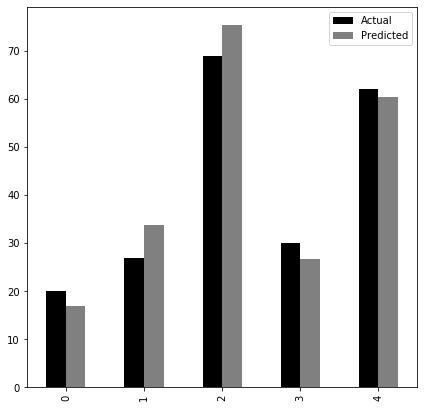

In [17]:
df.plot(kind='bar',figsize=(7,7),color=('black','grey'))
plt.show()

In [15]:
hours = 9.25
test = np.array([hours])
test = test.reshape(-1,1)
pred = r.predict([[9.5]])
print("NO. of hours = {}".format(hours))
print("Predicted Score = {}".format(pred[0]))

NO. of hours = 9.25
Predicted Score = 96.16939660753593


## Model Evaluation

**This step is particularly important to compare how well different algorithms perform on a particular dataset**

In [16]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('Explained Variance Score:',metrics.explained_variance_score(y_test,y_pred))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
Explained Variance Score: 0.9482829156738147


## Accuracy : 94%(0.9454)